# 패턴 작성 연습 1

In [1]:
import re

def printMatch(pstr, data):
    print(pstr)
    for x in data:
        mc = re.search(pstr, x)
        maxLen = max(len(x) for x in data)
        if mc:
            print(f'{x:{maxLen}} : {mc.start()}~{mc.end()}에 {mc.group()} 존재')
        else:
            print(f'{x:{maxLen}} : 문자열에 {pstr} 패턴이 존재하지 않음')

In [2]:
data = ('birthday:1990-12-12','birthday1990-12-12','93-6-30','a-b-c')
# 경계문자 + 숫자 1개 이상 + '-' + 숫자 1개 이상 + '-' + 숫자 1개 이상 + 경계문자
printMatch(r'\b\d+-\d+-\d+\b', data)

\b\d+-\d+-\d+\b
birthday:1990-12-12 : 9~19에 1990-12-12 존재
birthday1990-12-12  : 문자열에 \b\d+-\d+-\d+\b 패턴이 존재하지 않음
93-6-30             : 0~7에 93-6-30 존재
a-b-c               : 문자열에 \b\d+-\d+-\d+\b 패턴이 존재하지 않음


In [3]:
data = ('A:123-123-1234','123-1234-1234','C:12-34-5678')
# 경계문자 + 숫자 3개 + '-' + 숫자 3~4개 + '-' + 숫자 4개 + 경계문자
printMatch(r'\b\d{3}-\d{3,4}-\d{4}\b', data)

\b\d{3}-\d{3,4}-\d{4}\b
A:123-123-1234 : 2~14에 123-123-1234 존재
123-1234-1234  : 0~13에 123-1234-1234 존재
C:12-34-5678   : 문자열에 \b\d{3}-\d{3,4}-\d{4}\b 패턴이 존재하지 않음


In [4]:
data = ('phone:010-123-1234','phone010-123-1234','018-1234-1234','001-567-9876')
# 경계문자 + (010 011 012 016 017 018 019 중 1개) + '-' + 숫자 3~4개 + '-' + 숫자 4개 + 경계문자
printMatch(r'\b01[0-26-9]-\d{3,4}-\d{4}\b', data)

\b01[0-26-9]-\d{3,4}-\d{4}\b
phone:010-123-1234 : 6~18에 010-123-1234 존재
phone010-123-1234  : 문자열에 \b01[0-26-9]-\d{3,4}-\d{4}\b 패턴이 존재하지 않음
018-1234-1234      : 0~13에 018-1234-1234 존재
001-567-9876       : 문자열에 \b01[0-26-9]-\d{3,4}-\d{4}\b 패턴이 존재하지 않음


# 패턴 작성 연습 2

In [5]:
# so를 3 ~ 5회 반복 - greedy (큰 횟수)
data = ('sososo','sosososo','sososososo','soso')
printMatch(r'(so){3,5}', data)

(so){3,5}
sososo     : 0~6에 sososo 존재
sosososo   : 0~8에 sosososo 존재
sososososo : 0~10에 sososososo 존재
soso       : 문자열에 (so){3,5} 패턴이 존재하지 않음


In [6]:
# so를 3 ~ 5회 반복 - non-greedy (작은 횟수)
data = ('sososo','sosososo','sososososo','soso')
printMatch(r'(so){3,5}?', data)

(so){3,5}?
sososo     : 0~6에 sososo 존재
sosososo   : 0~6에 sososo 존재
sososososo : 0~6에 sososo 존재
soso       : 문자열에 (so){3,5}? 패턴이 존재하지 않음


In [7]:
# sa 또는 so 를 3 ~ 4회 반복
data = ('sasasa','sososo','sasosa','sososososo','sasasasaso','soso')
printMatch(r'(sa|so){3,4}', data)

(sa|so){3,4}
sasasa     : 0~6에 sasasa 존재
sososo     : 0~6에 sososo 존재
sasosa     : 0~6에 sasosa 존재
sososososo : 0~8에 sosososo 존재
sasasasaso : 0~8에 sasasasa 존재
soso       : 문자열에 (sa|so){3,4} 패턴이 존재하지 않음


In [8]:
# 숫자 1개 이상으로 이루어진 문자열 (숫자로만 이루어진 문자열)
data = ('1','12','1234','12ab34','12 34')
printMatch(r'^\d+$', data)
print("-" * 25)
printMatch(r'\d+', data)

^\d+$
1      : 0~1에 1 존재
12     : 0~2에 12 존재
1234   : 0~4에 1234 존재
12ab34 : 문자열에 ^\d+$ 패턴이 존재하지 않음
12 34  : 문자열에 ^\d+$ 패턴이 존재하지 않음
-------------------------
\d+
1      : 0~1에 1 존재
12     : 0~2에 12 존재
1234   : 0~4에 1234 존재
12ab34 : 0~2에 12 존재
12 34  : 0~2에 12 존재


# Quiz

In [9]:
import re

def printMatch(pstr, data):
    print(pstr)
    for x in data:
        mc = re.search(pstr, x)
        maxLen = max(len(x) for x in data)
        if mc:
            print(f'{x:{maxLen}} : {mc.start()}~{mc.end()}에 {mc.group()}존재')
        else:
            print(f'{x:{maxLen}} : 문자열에 {pstr}패턴이 존재하지 않음')

## 양수 검색

- 0보다 큰 양수를 검색하는 패턴을 작성하라
   - 1, 2, 3, ... 
- 단, 0, 01, 1a 등은 검색 대상으로 삼지 않는다
  - 0부터 시작된 숫자 또는 숫자 이외의 문자와 섞여 있으면 검색 대상이 아님
- 주어진 dataList를 패턴 확인용 데이터로 사용한다
- printMatch 함수를 사용하여 패턴의 동작을 확인한다

In [10]:
dataList = ('1', '12', '321', '100', '0', '01', '001', '1a')
printMatch(r'^[1-9]\d*$', dataList)

^[1-9]\d*$
1   : 0~1에 1존재
12  : 0~2에 12존재
321 : 0~3에 321존재
100 : 0~3에 100존재
0   : 문자열에 ^[1-9]\d*$패턴이 존재하지 않음
01  : 문자열에 ^[1-9]\d*$패턴이 존재하지 않음
001 : 문자열에 ^[1-9]\d*$패턴이 존재하지 않음
1a  : 문자열에 ^[1-9]\d*$패턴이 존재하지 않음


## 날짜 형식 찾기

- 규칙
   - 년도는 숫자 4글자이면서 19 또는 20으로 시작함
   - 월을 01 ~ 12로 표시되고, 일은 01~31로 표시됨
   - 윤달 및 28, 29, 30으로 끝나는 달을 별도 확인하지 않음
   - '-'를 사용하여 년, 월, 일을 구분함
   - 예) 1990-09-12, 2021-12-02

In [11]:
# 01 02 03 04 ...09 10 11 12 ... 19 20 21 22 ....29 30 31

In [12]:
data = ('1990-09-12', '2020-12-31', '2099-10-32', '89-01-08') 
printMatch(r'^(19|20)\d{2}-(0[1-9]|1[012])-(0[1-9]|[12][0-9]|3[01])$',  data)

^(19|20)\d{2}-(0[1-9]|1[012])-(0[1-9]|[12][0-9]|3[01])$
1990-09-12 : 0~10에 1990-09-12존재
2020-12-31 : 0~10에 2020-12-31존재
2099-10-32 : 문자열에 ^(19|20)\d{2}-(0[1-9]|1[012])-(0[1-9]|[12][0-9]|3[01])$패턴이 존재하지 않음
89-01-08   : 문자열에 ^(19|20)\d{2}-(0[1-9]|1[012])-(0[1-9]|[12][0-9]|3[01])$패턴이 존재하지 않음


## 메일 주소 찾기

- 규칙
   - @ 기호 앞은 '.'을 포함한 워드문자로 구성된 문자열이 올 수 있다 ('.'이 있을 수도 있고 없을수도 있음)
   - 단, '.'이 단독으로 존재하거나, '.'이 첫글자여서는 안된다.
   - @ 기호
   - @ 기호 뒤는 워드 문자가 1개 이상 온다
   - 위의 1개 이상의 워드 문자 뒤로 '.'으로 시작하고 워드문자 1개 이상으로 구성된 문자열이 1회 또는 2회 반복되어 사용된다 ('.'이 1, 2회 사용되어야 함)

In [13]:
import re

data = ('abc@naver.com', 'kbs.kim@gmail.or.kr', 'all.for.you.11@shopping.net', '.@naver.com', 'abcdef@abc', '3#@abc.co.kr')
printMatch(r'^\w[\.\w]*@\w+(\.\w+){1,2}$', data)

^\w[\.\w]*@\w+(\.\w+){1,2}$
abc@naver.com               : 0~13에 abc@naver.com존재
kbs.kim@gmail.or.kr         : 0~19에 kbs.kim@gmail.or.kr존재
all.for.you.11@shopping.net : 0~27에 all.for.you.11@shopping.net존재
.@naver.com                 : 문자열에 ^\w[\.\w]*@\w+(\.\w+){1,2}$패턴이 존재하지 않음
abcdef@abc                  : 문자열에 ^\w[\.\w]*@\w+(\.\w+){1,2}$패턴이 존재하지 않음
3#@abc.co.kr                : 문자열에 ^\w[\.\w]*@\w+(\.\w+){1,2}$패턴이 존재하지 않음


## 한글, 콤마(,) 및 소수 부분 제거- 금액에 함께 표기된 한글, 콤마(,) 및 소수 부분을 제거한다.
- 다음의 입력과 출력예시를 참조한다
> 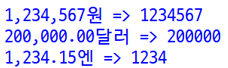


In [14]:
import re

def removeThings(data):
    return re.sub(r',|[가-힇]+|\.\d+', '', data)

datalist = ('1,234,567원', '200,000.00달러', '1,234.15엔')
for x in datalist:
    r = removeThings(x)
    print(f'{x} => {r}')

1,234,567원 => 1234567
200,000.00달러 => 200000
1,234.15엔 => 1234


## 주민등록번호 유효성 검사 및 암호 처리

- 주민등록번호에 대한 다음의 처리를 수행하는 코드를 작성하라
- 유효성 검사를 수행한다 (정밀한 검증이 아닌 형태에 대한 검증)
    - 숫자6자-숫자7자로 구성
    - 앞의 6글자 중 3,4번째는 01-12, 5,6번째는 01-31의 숫자, 뒤의 7글자 중 1번째는 1~4 중 한가지 이어야 함
- 유효한 주민등록번호인 경우 뒤의 7자를 *로 치환하여 출력하도록 한다
- 유효하지 않은 주민등록번호인 경우 ‘XX is NOT an id’를 출력 한다
- 다음의 입력과 출력예시를 참조한다
> 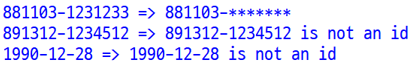

In [16]:
import re

def idcheck(data):
    ret = re.match(r'^\d{2}(0[1-9]|1[0-2])(0[1-9]|[12][0-9]|3[01])-[1-4]\d{6}$', data)
    return re.sub(r'\d{7}', '*' * 7, ret.group()) if ret else f'{data} is not an id'


datalist = ('881103-1231233', '891312-1234512', '1990-12-28')
for x in datalist:
    r = idcheck(x)
    print(f'{x} => {r}')

881103-1231233 => 881103-*******
891312-1234512 => 891312-1234512 is not an id
1990-12-28 => 1990-12-28 is not an id
